# Explore here

In [86]:
# Your code here
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_classif, SelectKBest

In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
df.head(10)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [88]:
# Obtener las dimensiones
df.shape


(41188, 21)

In [89]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

VALORES DUPLICADOS

In [90]:
# Verificar las filas duplicadas
duplicated_rows = df[df.duplicated()]

# Mostrar las filas duplicadas
print(duplicated_rows)

# Cantidad de filas duplicadas
print(f"\nNúmero de filas duplicadas: {len(duplicated_rows)}")

# Eliminar duplicados
df = df.drop_duplicates()


       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [91]:
# Obtener las nuevas dimensiones
df.shape

(41176, 21)

VALORES NULOS

In [92]:
# Crear una tabla resumen para todas las columnas
for col in df.columns:
    print(f"Columna: {col}")
    print(df[col].value_counts(), "\n")


Columna: age
age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64 

Columna: job
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 

Columna: marital
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64 

Columna: education
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64 

Columna: default
default
no         32577
unknown     8596
yes            3
Name: count

Teniendo en cuenta el resumen previo podemos hacer una limpieza de las siguientes columnas: 

* default:     ¿Tiene crédito actualmente? (categórico)   
Esta columna presenta dos opciones (no,yes), aun asi hay una cantidad considerable de filas sin datos conocidos y tan solo 3 que dan informacion que se posee un credito, asi que esta columna es irrelevante para el estudio. 
* housing: ¿Tiene un préstamo de vivienda? (categórico) y loan: ¿Tiene un préstamo personal? (categórico)  
Estas dos variables son importantes ya que tener un préstamo hipotecario puede reflejar responsabilidades financieras adicionales que podrían influir en su disposición para invertir.   
De este modo, eliminaremos las filas que no tengan informacion al respecto (unknow) ya que no nos darian mayor información. 

In [93]:
# Filtrar las filas donde ambas columnas no sean "unknown"
df_filtered = df.drop(columns=['default'])
df_filtered = df_filtered[~((df_filtered['housing'] == 'unknown') & (df_filtered['loan'] == 'unknown'))] # ~ invierte el resultado de la condición.

# Mostrar las primeras filas del DataFrame resultante
print(df_filtered.head())

# Verificar cuántas filas se eliminaron
print(f"Filas originales: {len(df)}")
print(f"Filas después del filtrado: {len(df_filtered)}")
print(f"Filas eliminadas: {len(df) - len(df_filtered)}")

   age        job  marital    education housing loan    contact month  \
0   56  housemaid  married     basic.4y      no   no  telephone   may   
1   57   services  married  high.school      no   no  telephone   may   
2   37   services  married  high.school     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no   no  telephone   may   
4   56   services  married  high.school      no  yes  telephone   may   

  day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon       261         1    999         0  nonexistent           1.1   
1         mon       149         1    999         0  nonexistent           1.1   
2         mon       226         1    999         0  nonexistent           1.1   
3         mon       151         1    999         0  nonexistent           1.1   
4         mon       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          

In [94]:
df_filtered.shape


(40186, 20)

VARIABLES NUMÉRICAS

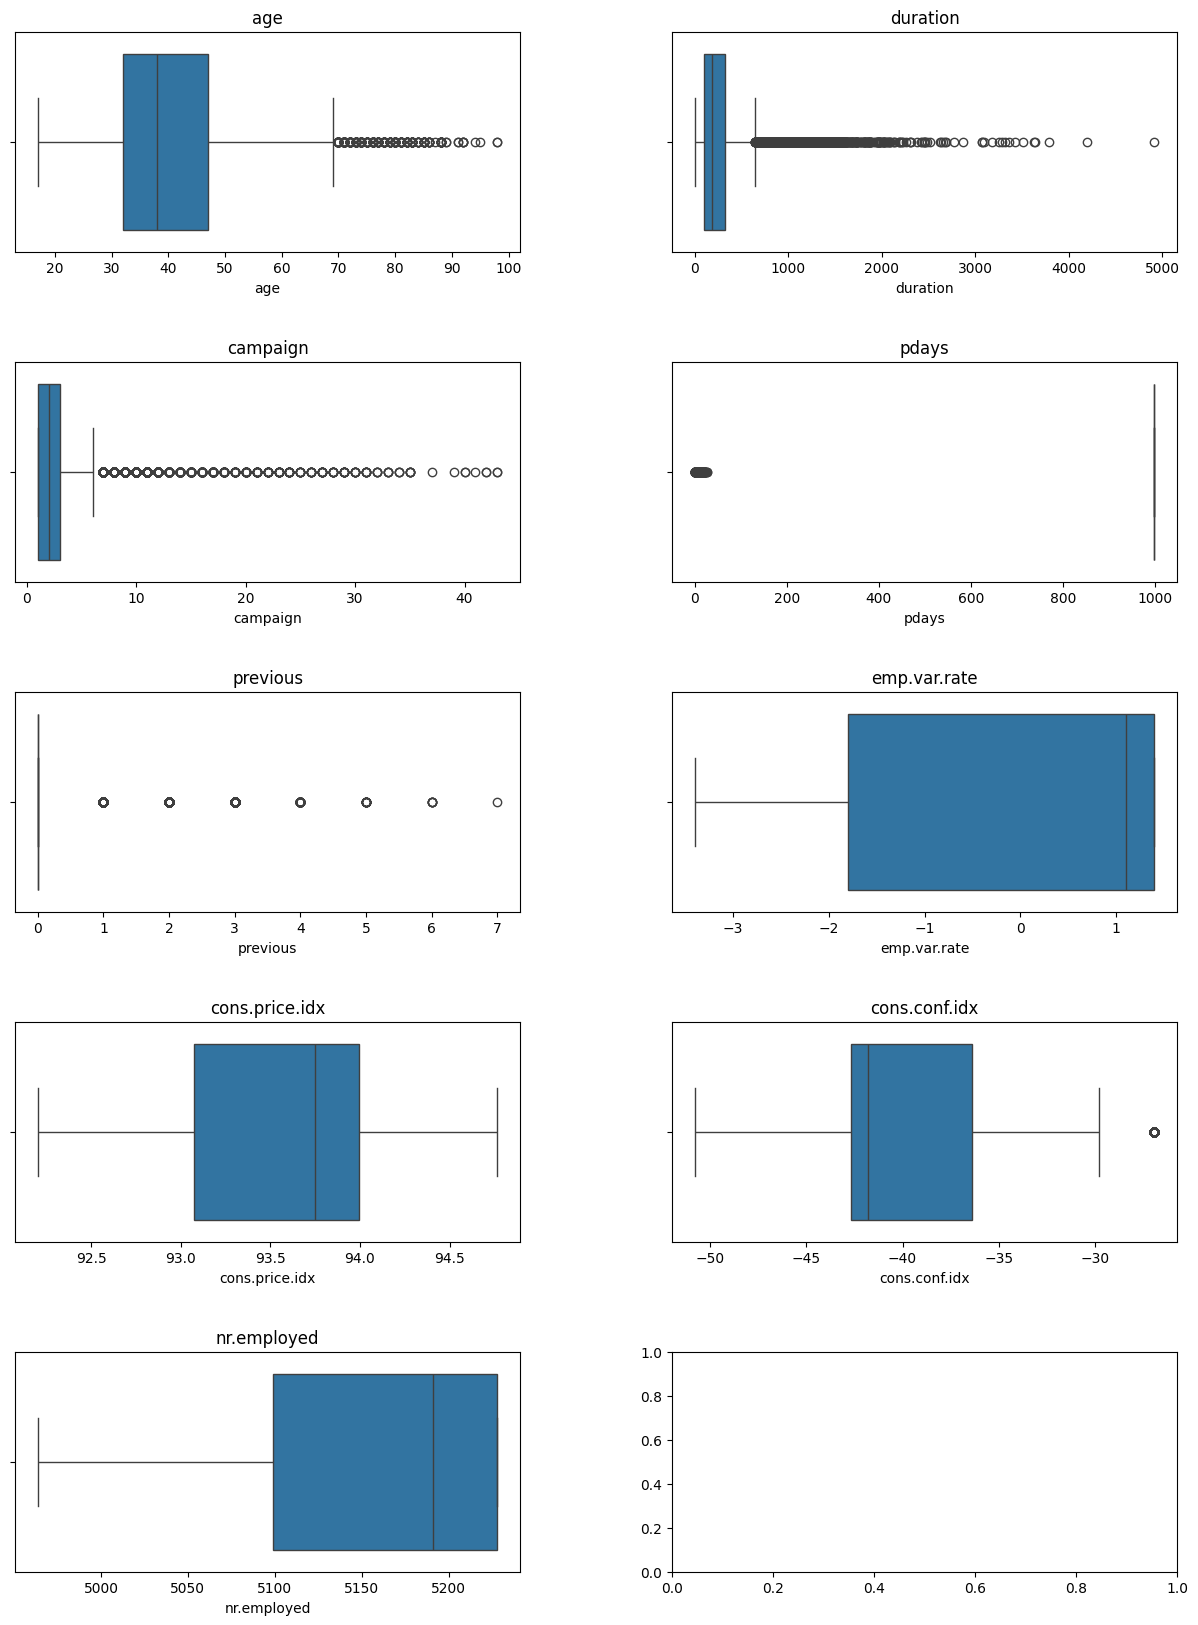

In [95]:
cols_num = ['age','duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','nr.employed']

'''
age. Edad del cliente (numérico)
duration. Duración del contacto previo en segundos (numérico)
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
nr.employed. Número de empleados. Indicador trimestral (numérico)
'''

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Ajusta los espacios entre gráficos

for i, col in enumerate(cols_num):
    row, col_index = divmod(i, 2)  # Calcula la fila y columna en la cuadrícula
    sns.boxplot(x=col, data=df_filtered, ax=ax[row, col_index])
    ax[row, col_index].set_title(col)


In [96]:
estadisticas_previous = df_filtered['previous'].value_counts(normalize=True) * 100
# Mostrar los resultados
print(estadisticas_previous)


previous
0    86.348480
1    11.075997
2     1.831484
3     0.520082
4     0.164236
5     0.044792
6     0.012442
7     0.002488
Name: proportion, dtype: float64


In [97]:
df_filtered.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40186.000000,40186.000000,40186.000000,40186.000000,40186.000000,40186.000000,40186.000000,40186.000000,40186.000000,40186.000000
mean,40.025581,258.515876,2.568059,962.404892,0.172722,0.081145,93.574235,-40.508127,3.620511,5167.049099
std,10.421759,259.413816,2.765787,187.084504,0.494140,1.570467,0.578193,4.629310,1.734302,72.228639
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [98]:
df_filtered=df_filtered[df_filtered['duration']<3600]

df_filtered.shape


(40181, 20)

* La columna "pdays" no contiene información relevante, la mayoria de datos parecen tener por defecto el valor "999", pudiendo ser un dato dado por defecto y esto no en un análisis posterior no nos proporcionaria nada valido. (999; 39661).   

* La columna "previous", aunque parece tener una distribución coherente al tener un 86% de los datos correspondientes a una misma categoria no es un buen indicador para un análisis posterior.   

* La columna "duration"   eliminamos los registros superiones a 1hr de duracion de la llamada dado que son valores muy superiores a lo que podria durar una llamada de contratación de un servicio.


In [99]:
df_filtered = df.drop(columns=['pdays', 'previous'])
df_filtered.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [100]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  poutcome        41176 non-null  object 
 13  emp.var.rate    41176 non-null  float64
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  nr.employed     41176 non-null  floa

ANALISIS DE VARIABLES CATEGÓRICAS

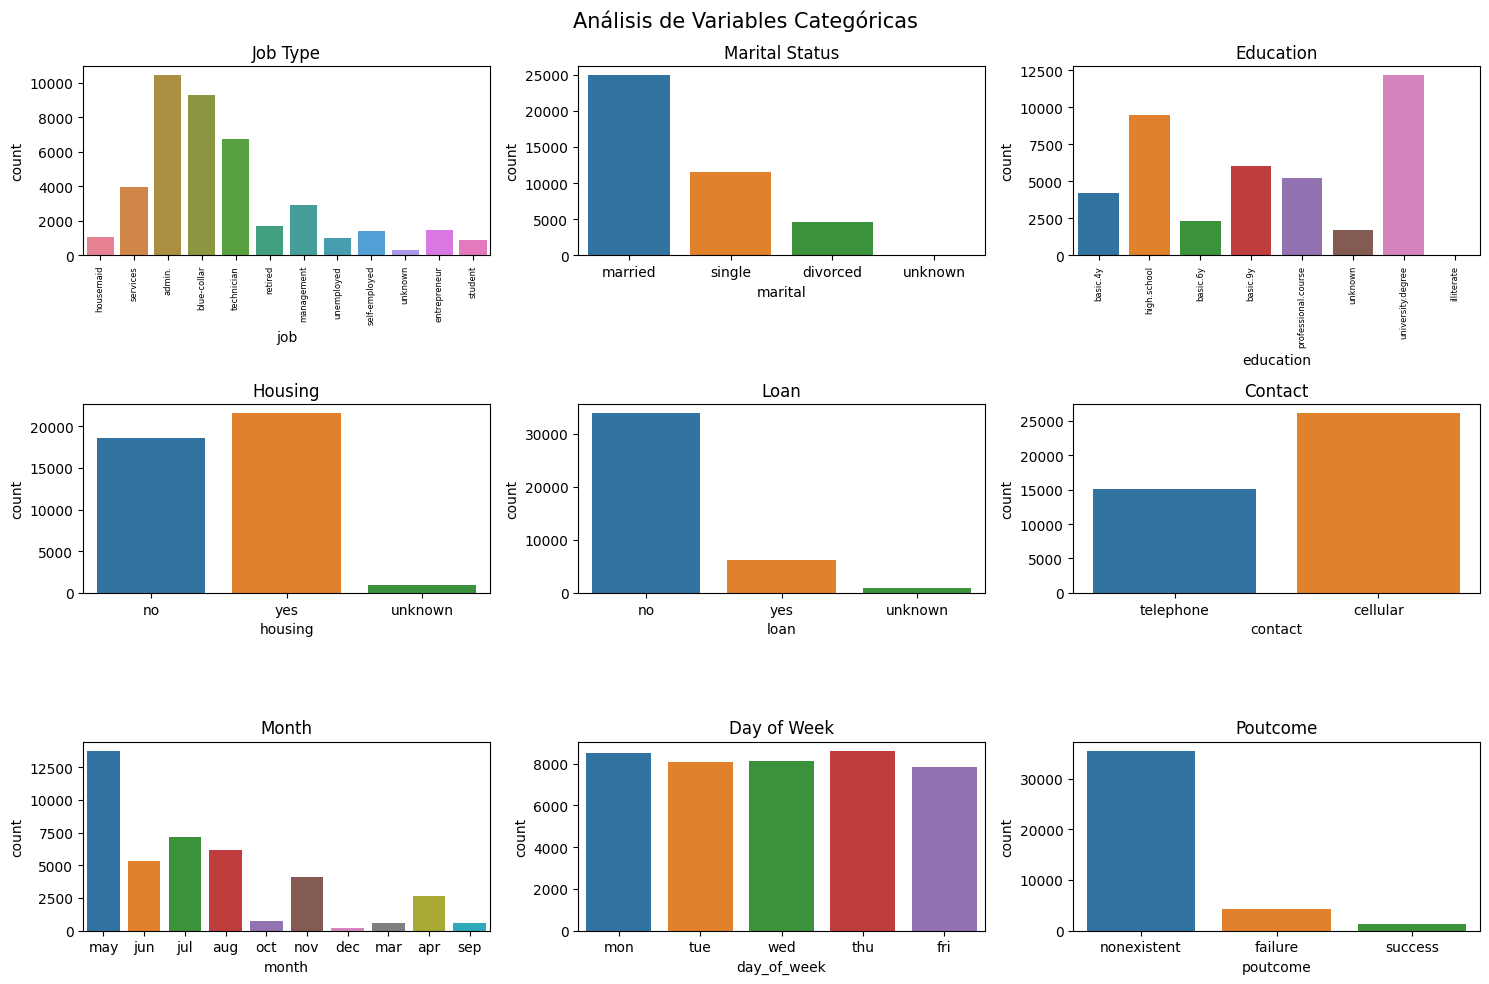

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y rejilla de subgráficos (3 filas x 3 columnas)
fig, ax = plt.subplots(3, 3, figsize=(15,10))   

# Graficar cada variable en un subplot correspondiente
sns.countplot(ax=ax[0, 0], data=df_filtered, x="job", hue="job")
ax[0, 0].set_title("Job Type")
ax[0, 0].tick_params(axis='x', rotation=90, labelsize=6)

sns.countplot(ax=ax[0, 1], data=df_filtered, x="marital", hue="marital")
ax[0, 1].set_title("Marital Status")

sns.countplot(ax=ax[0, 2], data=df_filtered, x='education', hue='education')
ax[0, 2].set_title("Education")
ax[0, 2].tick_params(axis='x', rotation=90, labelsize=6)

sns.countplot(ax=ax[1, 0], data=df_filtered, x='housing', hue='housing')
ax[1, 0].set_title("Housing")

sns.countplot(ax=ax[1, 1], data=df_filtered, x='loan', hue='loan')
ax[1, 1].set_title("Loan")

sns.countplot(ax=ax[1, 2], data=df_filtered, x='contact', hue='contact')
ax[1, 2].set_title("Contact")

sns.countplot(ax=ax[2, 0], data=df_filtered, x='month', hue='month')
ax[2, 0].set_title("Month")

sns.countplot(ax=ax[2, 1], data=df_filtered, x='day_of_week', hue='day_of_week')
ax[2, 1].set_title("Day of Week")

sns.countplot(ax=ax[2, 2], data=df_filtered, x='poutcome', hue='poutcome')
ax[2, 2].set_title("Poutcome")

# Ajustar diseño y agregar título
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.suptitle('Análisis de Variables Categóricas', fontsize=15)
plt.show()

Observando las gráficas vemos lo siguiente:

* La mayoría de los clientes no tiene un préstamo a largo plazo contratado, aunque si tienen una hipoteca en curso. 

* La mayoría de los clientes son admin, blue-collar o technician, mientras que hay una menor parte de housemaid, unemployed y student.

* Respecto al estado civil, aunque hay más solteros que divorciados, la mayoría están casados.

* En cuanto al nivel de estudios, la mayoría tienen estudios universitarios o la secundaria y una minoría tiene estudios básicos (4y y 6y)

* Respecto al préstamo personal, un gran porcentaje no lo tiene contratado.

* La mayoría de los clientes se les ha contactado durante el mes de mayo, esto puede ser debido a que en este mes las campañas de markting son mas numerosas.

* En cuanto al día de la semana en el que se ha contactado al cliente, el porcentaje esta muy igualado entre todos los días. Por lo que también podemos eliminar esta variable.

In [102]:
df_filtered = df.drop(columns=['day_of_week'])
df_filtered.head(5)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



 ANALISIS DE VARIABLES NUMÉRICAS

In [103]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null  floa

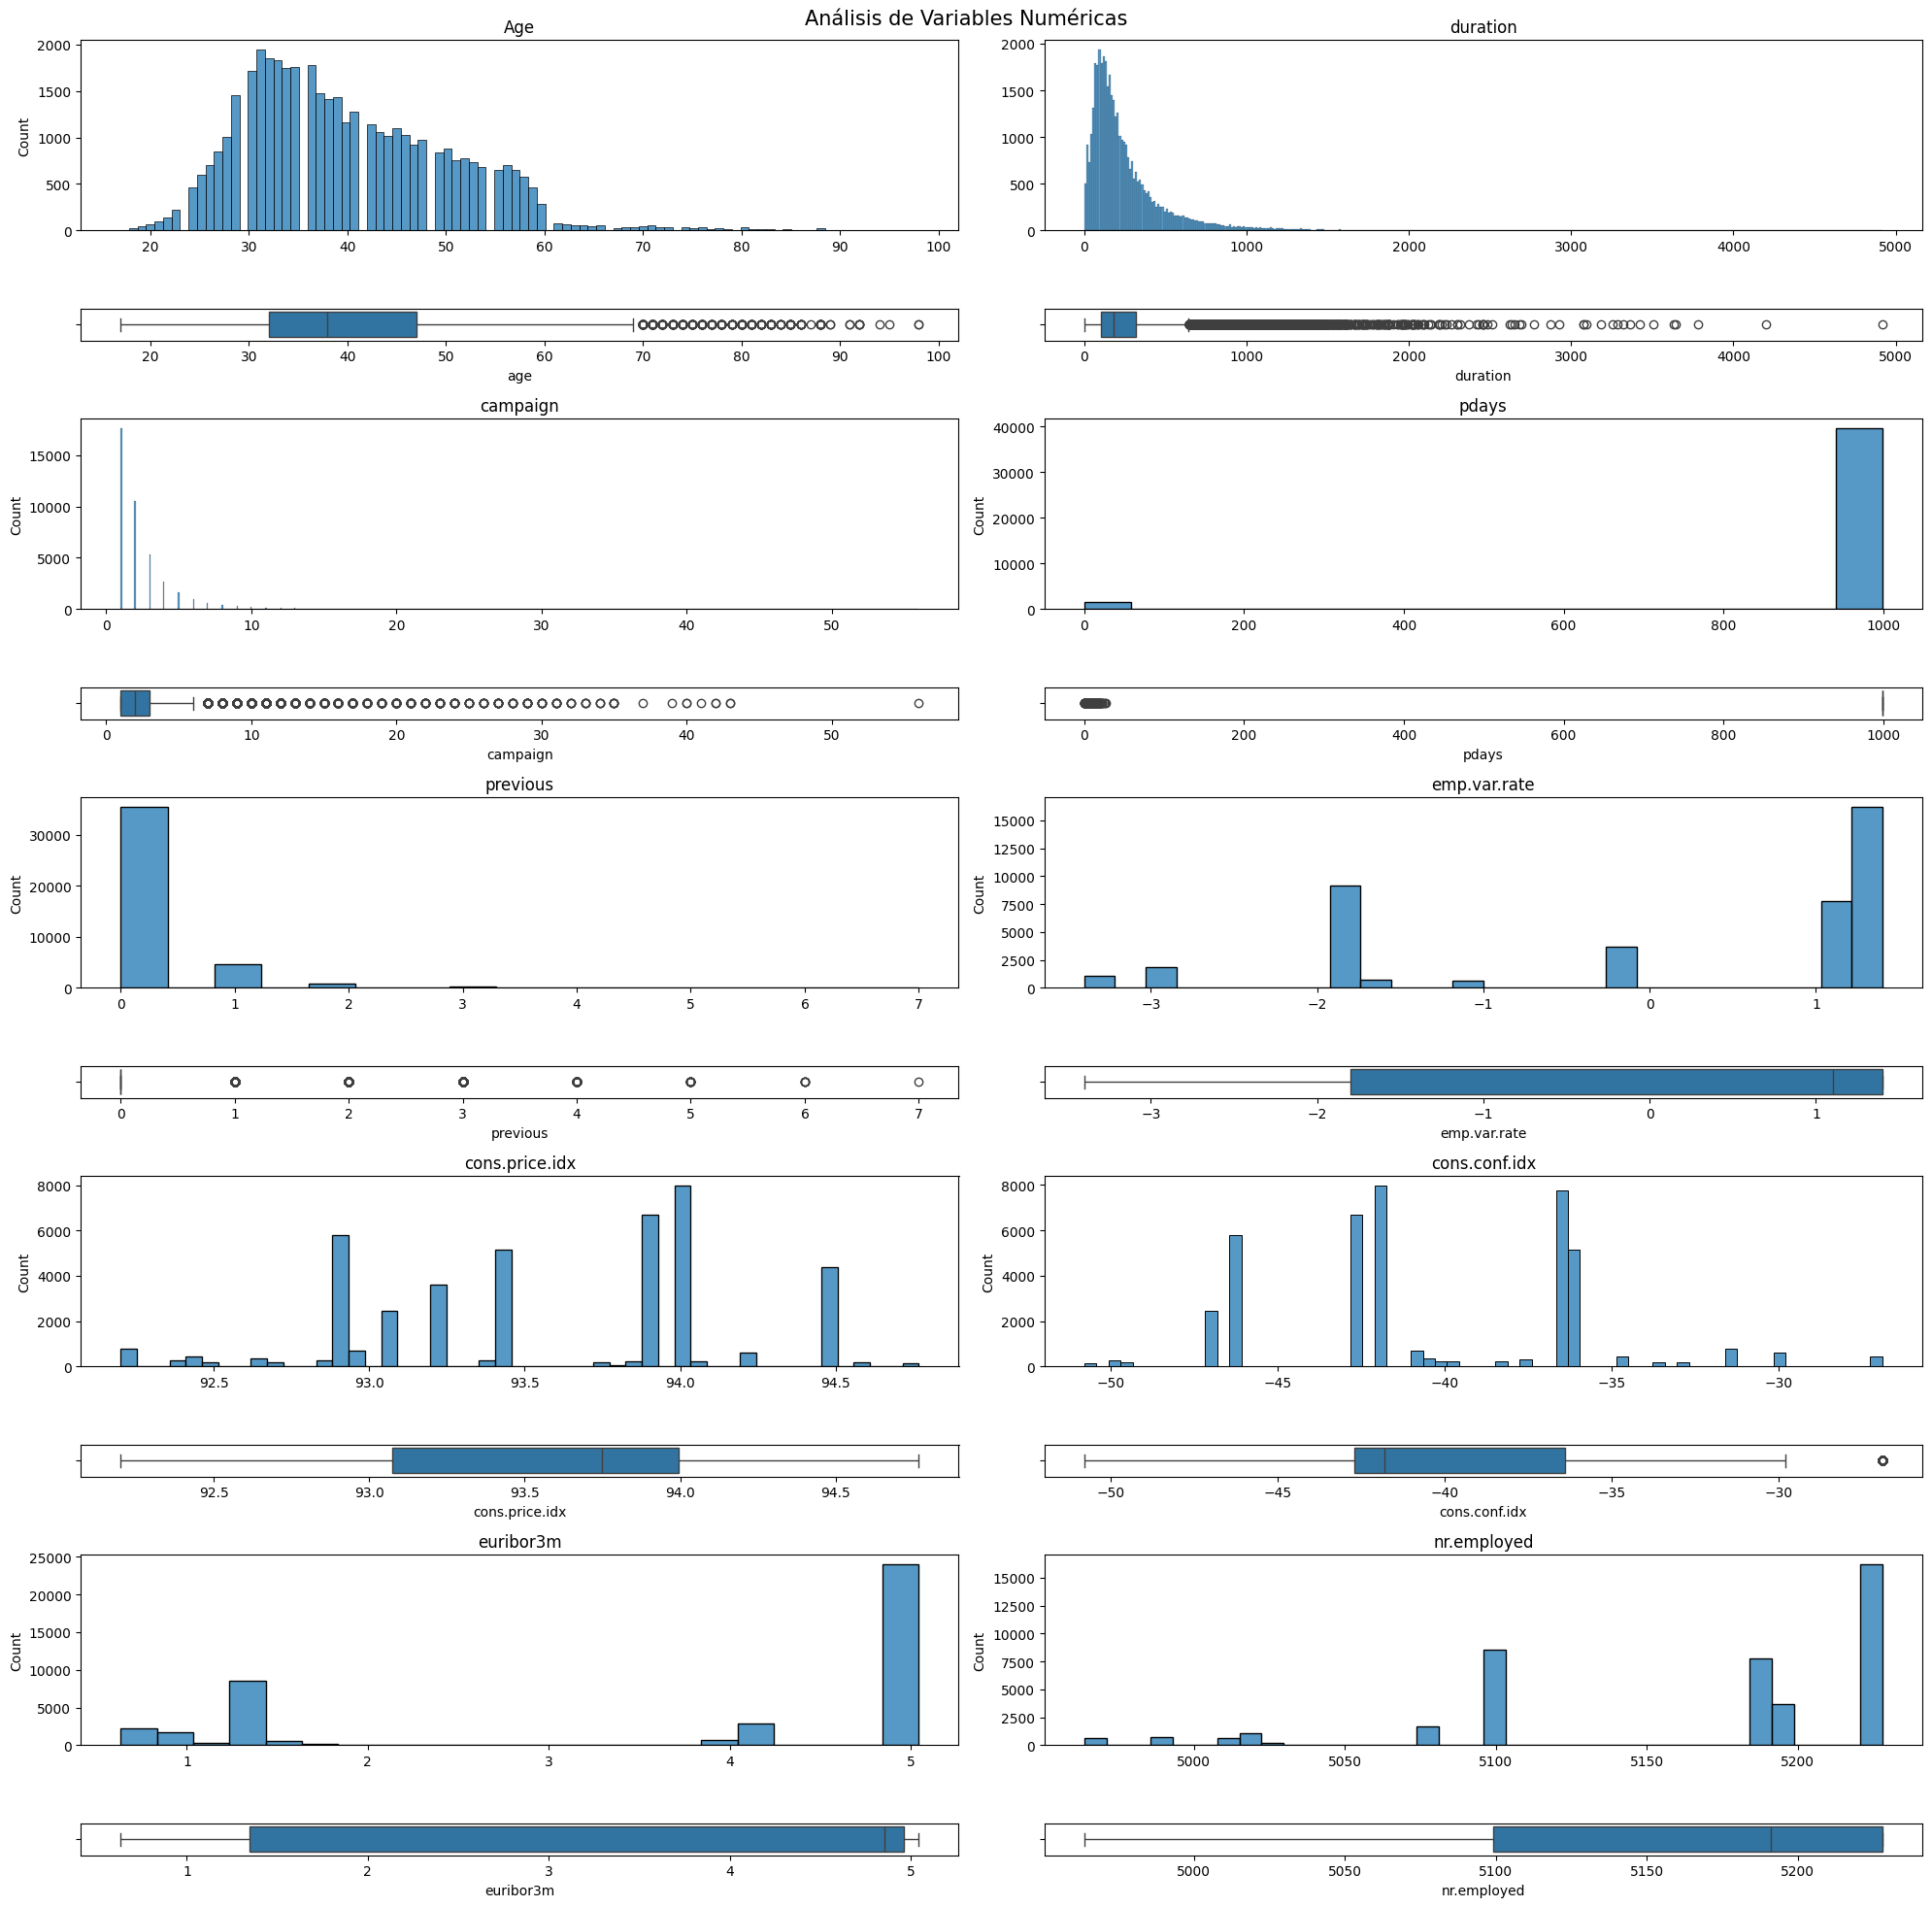

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(10, 2, figsize=(20, 20), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})
plt.suptitle('Análisis de Variables Numéricas', fontsize=15)

# Crear un histograma múltiple

# Edad
sns.histplot(ax=ax[0, 0], data=df_filtered, x="age").set(xlabel=None, title="Age")
sns.boxplot(ax=ax[1, 0], data=df_filtered, x="age")

# Duración llamada
sns.histplot(ax=ax[0, 1], data=df_filtered, x="duration").set(xlabel=None, ylabel=None, title="duration")
sns.boxplot(ax=ax[1, 1], data=df_filtered, x="duration")

# Campaña
sns.histplot(ax=ax[2, 0], data=df_filtered, x="campaign").set(xlabel=None, title="campaign")
sns.boxplot(ax=ax[3, 0], data=df_filtered, x="campaign")

# Días desde la ultima llamada
sns.histplot(ax=ax[2, 1], data=df_filtered, x="pdays").set(xlabel=None, title="pdays")
sns.boxplot(ax=ax[3, 1], data=df_filtered, x="pdays")

# Number of Reviews
sns.histplot(ax=ax[4, 0], data=df_filtered, x="previous").set(xlabel=None, title="previous")
sns.boxplot(ax=ax[5, 0], data=df_filtered, x="previous")

# Number of Reviews
sns.histplot(ax=ax[4, 1], data=df_filtered, x="emp.var.rate").set(xlabel=None, title="emp.var.rate")
sns.boxplot(ax=ax[5, 1], data=df_filtered, x="emp.var.rate")

# Number of Reviews
sns.histplot(ax=ax[6, 0], data=df_filtered, x="cons.price.idx").set(xlabel=None, title="cons.price.idx")
sns.boxplot(ax=ax[7, 0], data=df_filtered, x="cons.price.idx")

# Number of Reviews
sns.histplot(ax=ax[6, 1], data=df_filtered, x="cons.conf.idx").set(xlabel=None, title="cons.conf.idx")
sns.boxplot(ax=ax[7, 1], data=df_filtered, x="cons.conf.idx")

# Number of Reviews
sns.histplot(ax=ax[8, 0], data=df_filtered, x="euribor3m").set(xlabel=None, title="euribor3m")
sns.boxplot(ax=ax[9, 0], data=df_filtered, x="euribor3m")

# Number of Reviews
sns.histplot(ax=ax[8, 1], data=df_filtered, x="nr.employed").set(xlabel=None, title="nr.employed")
sns.boxplot(ax=ax[9, 1], data=df_filtered, x="nr.employed")

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Variables categoricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Variables numericas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


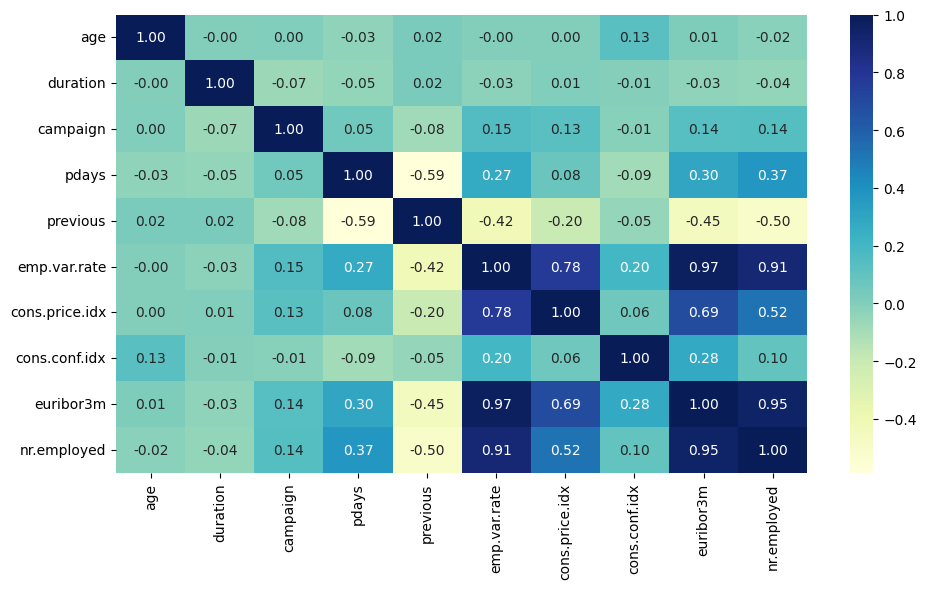

In [105]:
cat_cols = df_filtered.select_dtypes(include=['object']).columns.tolist()
num_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Variables categoricas:", cat_cols)
print("Variables numericas:", num_cols)

# Analisis multivariado numerico-numerico
fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(df_filtered[num_cols].corr(), cmap="YlGnBu", annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

Este heatmap muestra la correlación entre las variables numéricas del dataset. La correlación varía entre:

*  1:  Correlación positiva perfecta
*  0:  No hay correlación
*  -1:  Correlación negativa perfecta

* Hay alta correlación entre indicadores económicos emp.var.rate, euribor3m y nr.employed están altamente correlacionados (>0.9) Estos indicadores están relacionados con la situación económica general (si el empleo aumenta, el EURIBOR suele cambiar de forma similar).  

* Existe una relación negativa de previous y pdays con emp.var.rate, puede que cuando la tasa de empleo mejora, probablemente hay menos necesidad de contactar a clientes para campañas bancarias.  

* Baja correlación de age, duration y campaign con otros factores, casi no tiene correlación con ninguna variable. La edad no es un factor importante para ofrecer o no un deposito. Por otro lado, campaign (número de contactos en la campaña actual) no tiene relaciones fuertes con indicadores económicos o demográficos.

* Duración (duration) no tiene una fuerte correlación con otras variables, parece que duration de la llamada no está influenciada ni por las variables económicas ni por las variables intrinsecas del cliente. 


Transformación de variables categóricas en numéricas

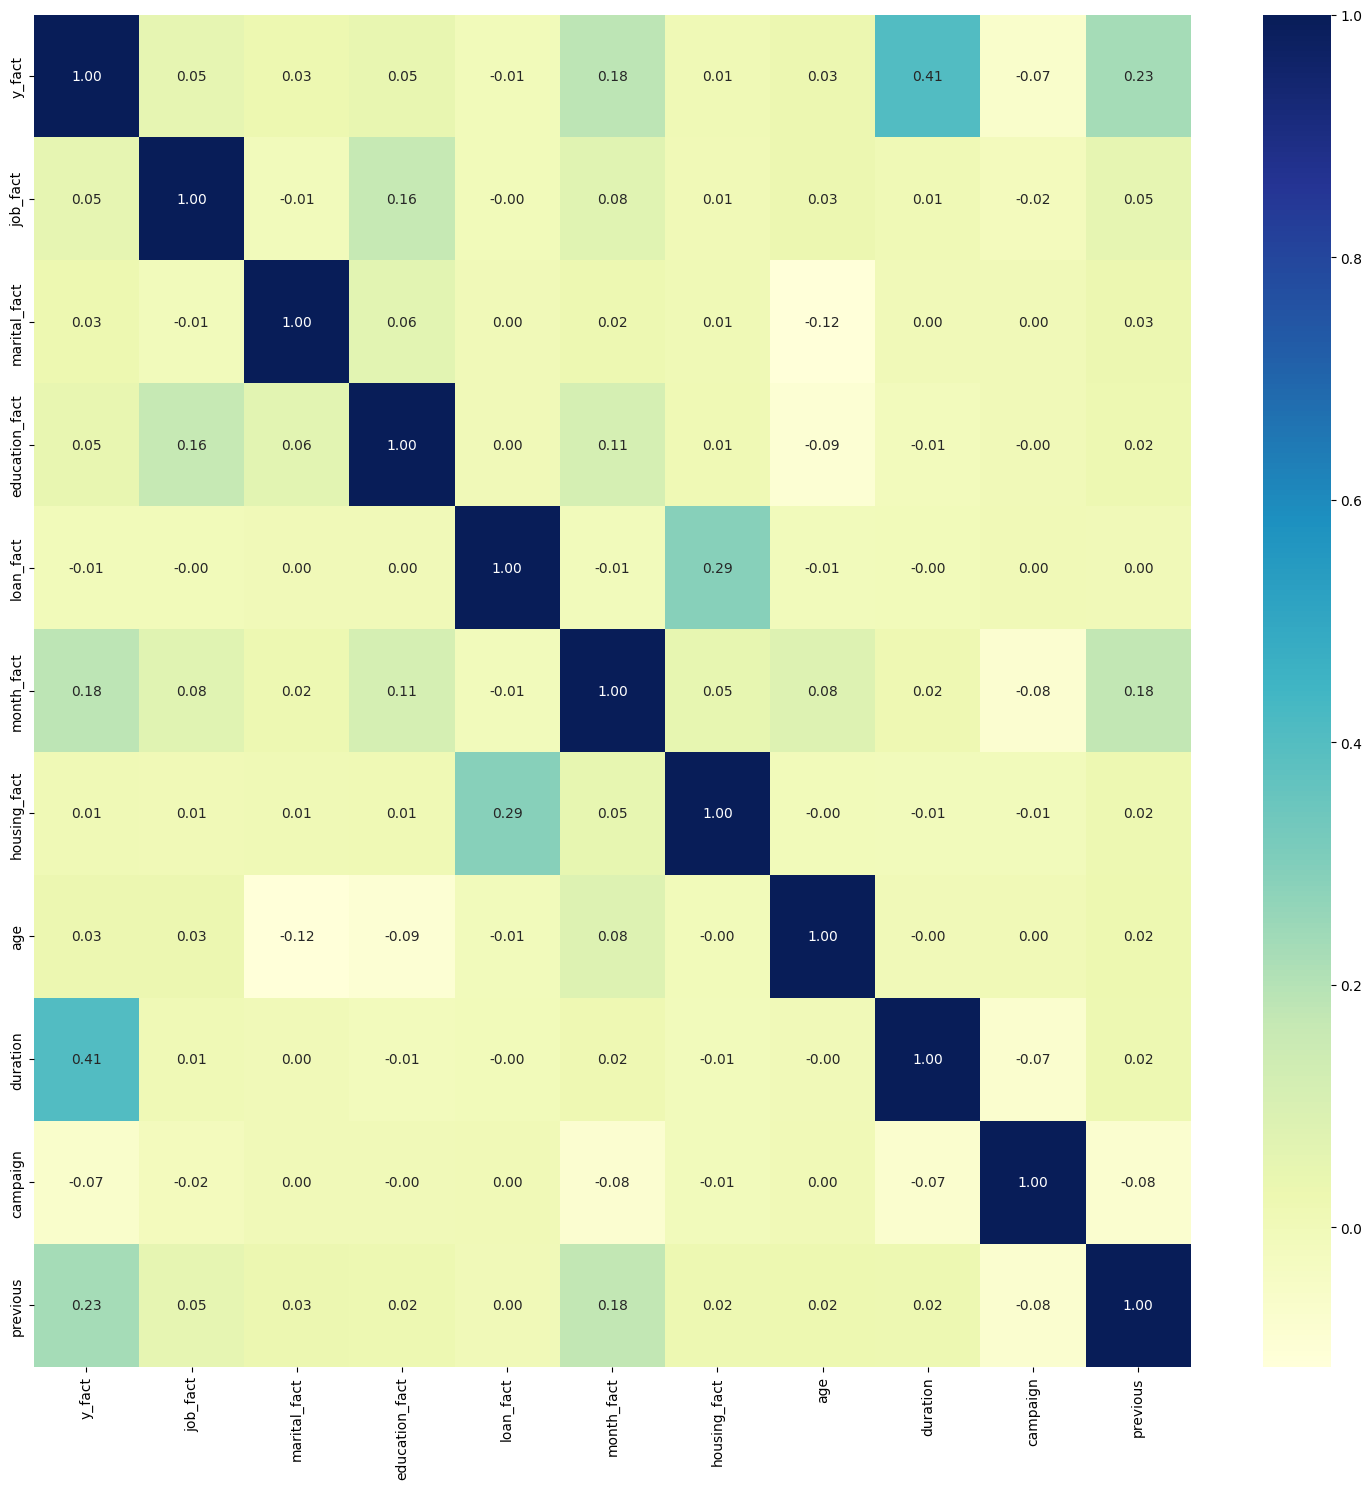

In [106]:
df_filtered["y_fact"] = pd.factorize(df_filtered["y"])[0]
df_filtered["job_fact"] = pd.factorize(df_filtered["job"])[0]
df_filtered["marital_fact"] = pd.factorize(df_filtered["marital"])[0]
df_filtered["education_fact"] = pd.factorize(df_filtered["education"])[0]
df_filtered["loan_fact"] = pd.factorize(df_filtered["loan"])[0]
df_filtered["month_fact"] = pd.factorize(df_filtered["month"])[0]
df_filtered["housing_fact"] = pd.factorize(df_filtered["housing"])[0]



fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df_filtered[['y_fact', 'job_fact', 'marital_fact', 'education_fact', 'loan_fact', 'month_fact', 'housing_fact', 'age', 'duration', 'campaign', 'previous']].corr(), cmap="YlGnBu", annot = True, fmt = '.2f')

plt.tight_layout()

plt.show()

Las variables categoricas que más relacionadas estan a nuestra variable objetivo son previous, duration y mounth.   
* Previous(Número de contactos realizados durante la campaña anterior al cliente),esta correlacionada siendo que si tenemos un mayor numero de veces contactadas con el cliente, lo mas probable es que tengamos la posibilidad de ofrecer el servicio. 
* Duration(Duración del contacto previo en segundos) A mayor tiempo de contacto con el cliente, determina mayor éxito en la adquisión del servicio.

REGRESIÓN LOGISTICA

In [107]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null  floa

In [108]:
#NORMALIZACIÓN DATOS

#Lista de variables a normalizar
num_variables = ["job_fact", "marital_fact","education_fact", "housing_fact", "loan_fact", "month_fact", "y_fact","age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

#Transforma los valores de cada columna al rango [0,1]
scaler = MinMaxScaler()
#Aplica la normalización(fit_transform)
scal_features = scaler.fit_transform(df_filtered[num_variables])
#Crear dataframe con los datos transformados
df_scal = pd.DataFrame(scal_features, index=df_filtered.index, columns=num_variables)
df_scal.head()

,job_fact,marital_fact,education_fact,housing_fact,loan_fact,month_fact,y_fact,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379
1,0.090909,0.0,0.142857,0.0,0.0,0.0,0.0,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379
2,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379
4,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379


Paso 1: Lectura del conjunto de datos procesado  

* El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad. Dividiremos también las predictoras de las características.  

* Para poder entrenar un modelo de aprendizaje automático de forma correcta es necesario seleccionar las características. Un proceso clave para mejorar el rendimiento de los modelos. En Python, uno de los posibles métodos para ello es SelectKBest

In [109]:
# Selección de caracteristicas

X = df_scal.drop('y_fact', axis=1)
y = df_scal['y_fact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1.1 Evaluación del rendimiento del modelo para diferentes valores de K

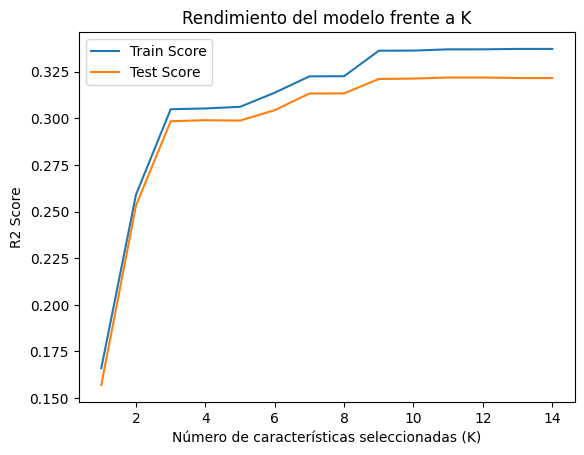

In [110]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

# Definir una lista de posibles valores de K
k_values = range(1, 15)
# Inicializar listas para almacenar los resultados de rendimiento
train_scores = []
test_scores = []
# Evaluar el rendimiento del modelo para cada valor de K
for k in k_values:
    # Seleccionar características utilizando SelectKBest
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Entrenar un modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    
    # Evaluar el rendimiento en el conjunto de entrenamiento
    train_score = model.score(X_train_selected, y_train)
    train_scores.append(train_score)
    
    # Evaluar el rendimiento en el conjunto de prueba
    X_test_selected = selector.transform(X_test)
    test_score = model.score(X_test_selected, y_test)
    test_scores.append(test_score)
    
    
# Visualizar los resultados
plt.plot(k_values, train_scores, label='Train Score')
plt.plot(k_values, test_scores, label='Test Score')
plt.xlabel('Número de características seleccionadas (K)')
plt.ylabel('R2 Score')
plt.title('Rendimiento del modelo frente a K')
plt.legend()
plt.show()



1.2 Selección de mejores caracteristicas usando SelectKBest

El K elegido es 8 ya que despues de k 8 el modelo se estabiliza y no muestra mayor variación para nuestro modelo. 

In [111]:
selection_model = SelectKBest(chi2, k=8)
selection_model.fit(X_train, y_train)

# Obtener las columnas seleccionadas
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_train.columns[ix])

# Mostrar las primeras filas de X_train_sel
X_train_sel.head()

,job_fact,month_fact,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m
0,0.909091,0.222222,0.058154,1.0,0.0,1.000000,0.669135,0.980503
1,0.181818,0.111111,0.036194,1.0,0.0,1.000000,0.882307,0.958966
2,0.181818,0.333333,0.020943,1.0,0.0,1.000000,0.484412,0.981410
3,0.181818,0.000000,0.027450,1.0,0.0,0.937500,0.698753,0.958059
4,0.272727,0.000000,0.084994,1.0,0.0,0.333333,0.269680,0.148946


In [112]:
#Agregamos las etiquetas de entrenamiento (y_train) y prueba (y_test) como una nueva columna en los dataframes X_train_sel y X_test_sel, respectivamente
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

#Guardamos los dataframes en formato .csv para usarlos posteriormente en el modelo de machine learning
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

'''
@Laura-Cruz-Gil ➜ /workspaces/LCG_logistic-regression (main) $ ls -lrt data/processed/
total 4652
-rw-rw-rw- 1 vscode vscode 3805992 Feb 23 21:31 clean_train.csv
-rw-rw-rw- 1 vscode vscode  951405 Feb 23 21:31 clean_test.csv
@Laura-Cruz-Gil ➜ /workspaces/LCG_logistic-regression (main) $ 
'''

'\n@Laura-Cruz-Gil ➜ /workspaces/LCG_logistic-regression (main) $ ls -lrt data/processed/\ntotal 4652\n-rw-rw-rw- 1 vscode vscode 3805992 Feb 23 21:31 clean_train.csv\n-rw-rw-rw- 1 vscode vscode  951405 Feb 23 21:31 clean_test.csv\n@Laura-Cruz-Gil ➜ /workspaces/LCG_logistic-regression (main) $ \n'

In [113]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,job_fact,month_fact,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,y_n
0,0.909091,0.222222,0.058154,1.0,0.0,1.000000,0.669135,0.980503,0.0
1,0.181818,0.111111,0.036194,1.0,0.0,1.000000,0.882307,0.958966,0.0
2,0.181818,0.333333,0.020943,1.0,0.0,1.000000,0.484412,0.981410,0.0
3,0.181818,0.000000,0.027450,1.0,0.0,0.937500,0.698753,0.958059,0.0
4,0.272727,0.000000,0.084994,1.0,0.0,0.333333,0.269680,0.148946,0.0


El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad. Dividiremos también las predictoras de las características.

In [114]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

Paso 2: Inicialización y entrenamiento del modelo¶

In [115]:
from sklearn.linear_model import LogisticRegression

modelo_ml = LogisticRegression()
modelo_ml.fit(X_train, y_train)

LogisticRegression()

Paso 3: Predicción del modelo

In [116]:
y_pred = modelo_ml.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.], shape=(8236,))

In [117]:
#debemos compararlo con la realidad, para saber si el modelo está acertando o no

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9000728508984944

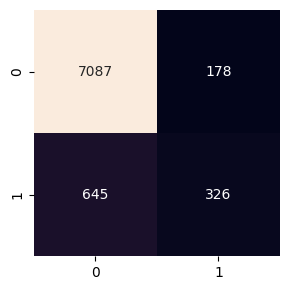

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(y_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

El modelo tiene un 90% de efectividad, modificaremos los hiperparametros para ver si podemos mejorar esta efectividad.  

1. Búsqueda en cuadrícula

In [119]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hiperparametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(modelo_ml, hiperparametros, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [120]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [121]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


Como vemos, los parámetros optimizados utilizando esta técnica son:

C: 10  
penalty: l2  
solver: lbfgs  
  
Además, siempre debemos utilizar el conjunto de datos de entrenamiento para ajustarlo. Ahora solo tenemos que repetir el entrenamiento estableciendo estos parámetros en el modelo:

In [122]:
model_grid = LogisticRegression(C = 10, penalty = 'l2', solver = 'lbfgs')
model_grid.fit(X_train, y_train)

LogisticRegression(C=10)

In [123]:
y_opt = model_grid.predict(X_test)
grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9000728508984944

Ultimo paso: guardar el modelo de Machine Learning entrenado en un archivo binario, esto permite utilizarlo sin tener que volver a entrenarlo

In [ ]:
from pickle import dump

dump(model_grid, open("../models/modelo_LC_RLogistica_opt.sav", "wb"))

'''
@Laura-Cruz-Gil ➜ /workspaces/LCG_logistic-regression (main) $ ls -lrt models/
total 4
-rw-rw-rw- 1 vscode vscode 923 Feb 23 23:20 modelo_LC_RLogistica_opt.sav
@Laura-Cruz-Gil ➜ /workspaces/LCG_logistic-regression (main) $ 
'''

'\n@Laura-Cruz-Gil ➜ /workspaces/LCG_logistic-regression (main) $ ls -lrt models/\ntotal 4\n-rw-rw-rw- 1 vscode vscode 923 Feb 23 23:19 modelo_LC_RLogistica_opt.sav\n@Laura-Cruz-Gil ➜ /workspaces/LCG_logistic-regression (main) $ \n'